In [12]:
from scipy import misc

# Load the image
ascent_image = misc.ascent()

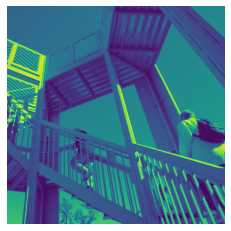

In [13]:
import matplotlib.pyplot as plt

# Visualize the image
plt.axis('off')
plt.imshow(ascent_image)
plt.show()

In [14]:
import numpy as np
# Copy image to a numpy array 
image_transformed = np.copy(ascent_image)
# Get the dimensions of image
size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]

In [15]:
# Create a 3x3 conv filter
filter = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]       # -> this is supposed to highlight sharp edges

# Other filters to try
# filter = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]   # -> this is supposed to highlight horizontal lines
# filter = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]   # -> this is supposed to highlight vertical lines

weight = 1
# If all the digits in the filter don't add up to 0 or 1, you should do a weight to get it to do so.
# i.e., if the filter is [1,1,1], [1,2,1], [1,1,1] -> add up to 10 -> then weight should be set to 0.1

To create a convolution: Iterate over the image, multiply each of the neighbours of the current pixel by the value specified in the filter.
(i.e. the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter, etc.)
<br/>
Then sum it all up.
<br/><br/>
Then you multiply the result by weight, and ensure the result is in range 0-255.

Finally, you load the new value into the transformed image.

In [16]:
# Iterate over the image
for x in range(1, size_x-1):      # Start from 1 and ends at size_x - 1 because filter size is 3x3, so the pixels at the margins cannot be calculated
  for y in range(1, size_y-1):
    conv = 0.0
    conv += (ascent_image[x-1][y-1] * filter[0][0])
    conv += (ascent_image[x-1][y] * filter[0][1])
    conv += (ascent_image[x-1][y+1] * filter[0][2])
    conv += (ascent_image[x][y-1] * filter[1][0])
    conv += (ascent_image[x][y] * filter[1][1])
    conv += (ascent_image[x][y+1] * filter[1][2])
    conv += (ascent_image[x+1][y-1] * filter[2][0])
    conv += (ascent_image[x+1][y] * filter[2][1])
    conv += (ascent_image[x+1][y+1] * filter[2][2])

    # Multiply by weight
    conv *= weight

    # Check the boundary values, ensure the result is in range 0-255
    if conv < 0:
      conv = 0
    if conv > 255:
      conv = 255
    
    # Load into the transformed image
    image_transformed[x, y] = conv

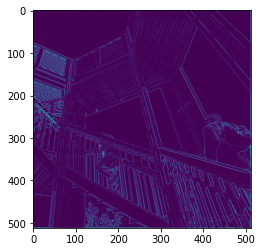

In [20]:
# Plot the transformed image
plt.imshow(image_transformed)
plt.show()

# Effect of Max Pooling

We will experiment with a 2x2 max pooling filter. The idea of max pooling is to iterate the filter over the image, keep the highest pixel value in the area covered by the filter and throw away the other pixel values.
<br/><br/>
The highest pixel value is then loaded into the new image.
<br/><br/>
Because the filter size is 2x2, thus the new image will be 1/4 size of the old image - with X and Y being halved. 
<br/><br/>
The interesting thing is although the image is greatly compressed, the features are still well maintained.

In [18]:
# Dimensions of the pooled image
new_x = int(size_x/2)
new_y = int(size_y/2)

# Create blank image with reduced dimensions
new_image = np.zeros((new_x, new_y))

# Iterate over the image
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):

    # Get all pixel values in the 2x2 area
    pixels = []
    pixels.append(image_transformed[x, y])
    pixels.append(image_transformed[x+1, y])
    pixels.append(image_transformed[x, y+1])
    pixels.append(image_transformed[x+1, y+1])

    # Get the highest pixel value
    new_image[int(x/2),int(y/2)] = max(pixels)

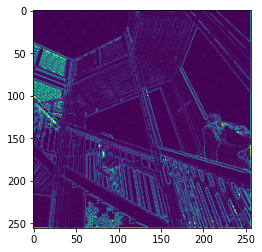

In [19]:
# Plot pooled image
plt.imshow(new_image)
plt.show()

Note the axes - it was 512x512 pixels before but now it is 256x256 pixels